
## Q1. Write a Data Science Proposal for achieving the objective mentioned.

### Given a product review, classify whether the review is of positive or negative, based on the sentiment.

### This is binary classification problem involving Natural Language Processing.

### Basic Structure
### Stop word Removal  lemmatizationVectorizationModel Training  Hyper Parameter Tuning Evaluation Metrics

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv(r'C:\DataScience\Sem2\IDS\Assignment\1429_1.csv')
df2=pd.read_csv(r'C:\DataScience\Sem2\IDS\Assignment\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
df3=pd.read_csv(r'C:\DataScience\Sem2\IDS\Assignment\Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [3]:
## We will be only considering the reviews and rating as specified in the question
## checking for null values in the 3 data sets

In [4]:
a=df1[['reviews.text','reviews.rating']].isnull().sum()
b=df2[['reviews.text','reviews.rating']].isnull().sum()
c=df3[['reviews.text','reviews.rating']].isnull().sum()
print("""df1 nulls = 
{0} ,df1 shape = {1}
df2 nulls = 
{2} ,df1 shape = {3}
df3 nulls = 
{4} ,df1 shape = {5}""".format(a,df1.shape,b,df2.shape,c,df3.shape))

df1 nulls = 
reviews.text       1
reviews.rating    33
dtype: int64 ,df1 shape = (34660, 21)
df2 nulls = 
reviews.text      0
reviews.rating    0
dtype: int64 ,df1 shape = (5000, 24)
df3 nulls = 
reviews.text      0
reviews.rating    0
dtype: int64 ,df1 shape = (28332, 24)


In [5]:
##AS there are no nulls in two source datasets and one has very few nulls we will drop those nulls and concat everything to form
## a single dataframe

In [6]:
data=pd.concat([df1[['reviews.text','reviews.rating']].dropna(),df2[['reviews.text','reviews.rating']],df3[['reviews.text','reviews.rating']]])

## Q2. Perform exploratory analysis on the data.

<AxesSubplot:>

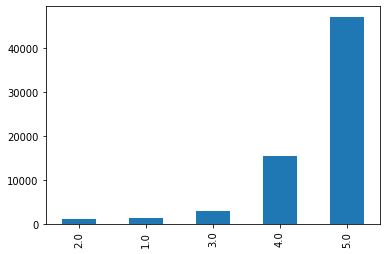

In [7]:
#2. Perform exploratory analysis on the data.
data["reviews.rating"].value_counts().sort_values().plot.bar()

In [8]:
##Since its a NLP problem we cant plot the input features but the given classification probelm is extremely imbalanaced

<BarContainer object of 2 artists>

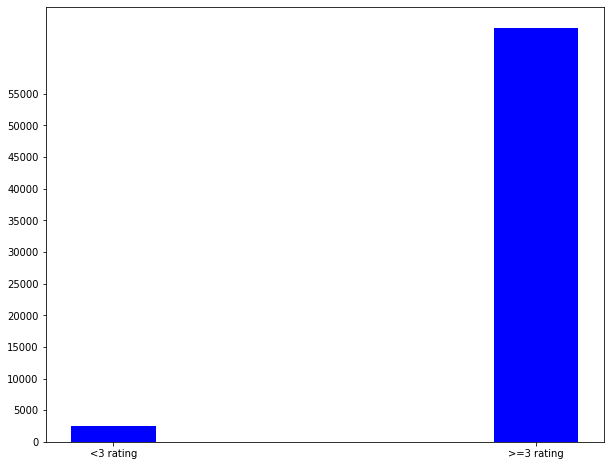

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
a=data["reviews.rating"]>=3
reviews_split = {'<3 rating':a.value_counts().sort_values()[0], '>=3 rating':a.value_counts().sort_values()[1]}
fig = plt.figure(figsize = (10, 8))
plt.yticks(np.arange(0, 60000, 5000))
plt.bar(['<3 rating','>=3 rating'], [a.value_counts().sort_values()[0],a.value_counts().sort_values()[1]], color ='blue',width=0.2)


In [10]:
##from the above we can infer that the positive reviews (>=3 rating) outscale the -ve reviews (<3 rating) 25:1

## Q3. Perform data wrangling / pre-processing.

# DATA PREPROCESSING

In [11]:
##converting to lower case before applying the preprocessing
data['lowercase_reviews']=data['reviews.text'].str.lower()

In [12]:
##Now we do remove punctuations from the text
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
data["text_wo_punct"] = data['lowercase_reviews'].apply(lambda text: remove_punctuation(text))

In [13]:
##Now removing the stop words using nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data["text_wo_stop"] = data["text_wo_punct"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\storm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
##Generating the lemmatized text now using nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} ##using PartofScpeech tagging to  lemmatize
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text]) 

data["text_lemmatized"] = data["text_wo_stop"].apply(lambda text: lemmatize_words(text))

In [15]:
##We are categorizing >= 3 rating as +ve reviews and less than 3 as negative reviews
data['label']=(data['reviews.rating'] >= 3)

In [16]:
##Before proceeding further we will  just keep the 2 required columns ('text_lemmatized', 'label') in the data dataframe and drop
## remaining columns

In [17]:
data=data[['text_lemmatized', 'label']]

In [18]:
data.shape

(67958, 2)

## Q4- Apply any 2 features engineering technique.

# FEATURE ENGINEERING

## We will be using bag of words (sklearn countvectorizer) and TFIDF to generate the features for the models

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
X = data["text_lemmatized"]
y=data['label']

In [21]:
## splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
##Using count vectorizer to feature engineer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_count = CountVectorizer()
X_train_bow=vectorizer_count.fit_transform(X_train)
X_test_bow=vectorizer_count.transform(X_test)

In [23]:
##centering the data using mean=False because of sparse matrix
scaler=StandardScaler(with_mean=False)
X_train_bow=scaler.fit_transform(X_train_bow)
X_test_bow=scaler.transform(X_test_bow)

In [24]:
##Using tfidf vectorizer
vectorizer_tfidf=TfidfVectorizer()
X_train_tfidf=vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf=vectorizer_tfidf.transform(X_test)

In [25]:
scaler=StandardScaler(with_mean=False)
X_train_tfidf=scaler.fit_transform(X_train_tfidf)
X_test_tfidf=scaler.transform(X_test_tfidf)

# Q7. Design Machine Learning models –Logistic regression and Decision tree to predict.

# MODEL TRAINIG AND HYPERPARAMTER TUNING
## Two models will be trained Decision Trees and Logistic Regression

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
## We will be using RandomSearchCV for hyperparameter tuning using 5 fold cross validation (default) on the train set

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
##Traiining 2 Decision Tree classifiers for bag of words features and tfidf features
## handling class imbalance using balanced class weights
DTCcountvec=DecisionTreeClassifier(class_weight='balanced')
DTCtfidfvec=DecisionTreeClassifier(class_weight='balanced')


In [33]:
## specifying the search space for Decision Tree classifiers
params_DT={'max_depth':[100,200,500,None],'max_features':["auto", "sqrt" ,"log2"],
           'criterion':["gini", "entropy"]
          }

In [41]:
##defining a classifier for bag of words approach
DTCcountvec_tuned = RandomizedSearchCV(DTCcountvec, params_DT,n_iter=24,scoring='f1',n_jobs=-1,random_state=42) ##n=24 as we have 24 combinations in the earch space

In [47]:
##finding the best parameter combinations using RandomSearch for decision trees and bag of words features
DTCcountvec_tuned.fit(X_train_bow,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_iter=24, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [100, 200, 500, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   random_state=42, scoring='f1')

In [51]:
DTCcountvec_tuned.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=200,
                       max_features='auto')

In [52]:
##defining a classifier for tfidf approach
DTCtfidfvec_tuned = RandomizedSearchCV(DTCtfidfvec, params_DT, random_state=42,n_iter=24,scoring='f1',n_jobs=-1)

In [53]:
##finding the best parameter combinations using RandomSearch for decision trees and tfidf features
DTCtfidfvec_tuned.fit(X_train_tfidf,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_iter=24, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [100, 200, 500, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']},
                   random_state=42, scoring='f1')

In [54]:
DTCtfidfvec_tuned.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=500, max_features='auto')

In [55]:
##Training a logistic Regression Classifier for both bow approach and tfidf approach
## handling class imbalance using balanced class weights

In [56]:
from sklearn.linear_model import LogisticRegression
lrclfcountvec = LogisticRegression(max_iter=10000,class_weight='balanced')
lrclftfidfvec = LogisticRegression(max_iter=10000,class_weight='balanced')


In [57]:
##The below 2 random searches take around 10 mins on a ryzen54600H 12 core processor , kindly be patient if you are running on
## a slower machine , also 10000 iterations was required for convergence

In [58]:
params_LR={
    'penalty':['l1', 'l2', 'elasticnet', 'none'],
    'C':[0.6,0.8,1.0]
}

In [59]:
lrclfcountvec_tuned = RandomizedSearchCV(lrclfcountvec, params_LR, random_state=42,n_iter=60,scoring='f1',n_jobs=-1)

In [60]:
lrclfcountvec_tuned.fit(X_train_bow,y_train)

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=10000),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'C': [0.6, 0.8, 1.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   random_state=42, scoring='f1')

In [61]:
lrclfcountvec_tuned.best_estimator_

LogisticRegression(C=0.6, class_weight='balanced', max_iter=10000)

In [62]:
lrclftfidfvec_tuned = RandomizedSearchCV(lrclftfidfvec, params_LR, random_state=42,n_iter=60,scoring='f1',n_jobs=-1)

In [63]:
lrclftfidfvec_tuned.fit(X_train_tfidf,y_train)

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=10000),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'C': [0.6, 0.8, 1.0],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   random_state=42, scoring='f1')

In [64]:
lrclftfidfvec_tuned.best_estimator_

LogisticRegression(C=0.6, class_weight='balanced', max_iter=10000)

## Q8. Compare the performance of selected feature engineering techniques.
## Q9. Compare the performance of the 2 classifiers –Logistic regression and Decision tree to predict.

# COMPARING THE CLASSIFIERS AND FEATURE ENGINEERING TECHNIQUES

### USING CONFUSION MATRIX ,ROC AND F SCORE AS IT IS A IMBALANCED CLASS PROBLEM

In [65]:
##calculating predcitions for both classifiers and for both types of features
y_pred_countvecLR=lrclfcountvec_tuned.predict(X_test_bow)
y_pred_tfidfvecLR=lrclftfidfvec_tuned.predict(X_test_tfidf)
y_pred_countvecDTC=DTCcountvec_tuned.predict(X_test_bow)
y_pred_tfidfvecDTC=DTCtfidfvec_tuned.predict(X_test_tfidf)

In [66]:
##confusion matrix 
from sklearn.metrics import confusion_matrix
print("Decision Tree with bag of words-")
print(confusion_matrix(y_test,y_pred_countvecDTC))
print("Decision Tree with tfidf-")
print(confusion_matrix(y_test,y_pred_tfidfvecDTC))
print("Logistic Regression with bag of words-")
print(confusion_matrix(y_test,y_pred_countvecLR))
print("Logistic Regression with tfidf-")
print(confusion_matrix(y_test,y_pred_tfidfvecLR))

Decision Tree with bag of words-
[[  259   229]
 [  245 12859]]
Decision Tree with tfidf-
[[  267   221]
 [  242 12862]]
Logistic Regression with bag of words-
[[  347   141]
 [  428 12676]]
Logistic Regression with tfidf-
[[  336   152]
 [  465 12639]]


In [67]:
##f1 score
from sklearn.metrics import f1_score
print("PRINTING F1 SCORES FOR ALL CLASSIFIERS")
print("Decision Tree with bag of words-")
print(f1_score(y_test,y_pred_countvecDTC))
print("Decision Tree with tfidf-")
print(f1_score(y_test,y_pred_tfidfvecDTC))
print("Logistic Regression with bag of words-")
print(f1_score(y_test,y_pred_countvecLR))
print("Logistic Regression with tfidf-")
print(f1_score(y_test,y_pred_tfidfvecLR))

PRINTING F1 SCORES FOR ALL CLASSIFIERS
Decision Tree with bag of words-
0.981902871105681
Decision Tree with tfidf-
0.9823194714934891
Logistic Regression with bag of words-
0.9780486863932718
Logistic Regression with tfidf-
0.9761730063718863


In [70]:
 from sklearn.metrics import roc_curve,roc_auc_score

In [71]:
##caluclating probabilities for plotting ROC
y_score_DTC_bow = DTCcountvec_tuned.predict_proba(X_test_bow)[:,1]
y_score_DTC_tfidf = DTCtfidfvec_tuned.predict_proba(X_test_bow)[:,1]
y_score_LR_bow = lrclfcountvec_tuned.predict_proba(X_test_bow)[:,1]
y_score_LR_tfidf = lrclftfidfvec_tuned.predict_proba(X_test_bow)[:,1]

In [72]:
##calculating FPR and TPR
false_positive_rate_DTC_bow , true_positive_rate_DTC_bow , threshold_DTC_bow = roc_curve(y_test, y_score_DTC_bow)
false_positive_rate_DTC_tfidf , true_positive_rate_DTC_tfidf , threshold_DTC_tfidf = roc_curve(y_test, y_score_DTC_tfidf)
false_positive_rate_LR_bow , true_positive_rate_LR_bow , threshold_LR_bow = roc_curve(y_test, y_score_LR_bow)
false_positive_rate_LR_tfidf , true_positive_rate_LR_tfidf , threshold_LR_tfidf = roc_curve(y_test, y_score_LR_tfidf)

In [73]:
## ROC AUC scores
print("PRINTING ROC AUC SCORES FOR ALL CLASSIFIERS")
print("Decision Tree with bag of words-")
print(roc_auc_score(y_test,y_score_DTC_bow))
print("Decision Tree with tfidf-")
print(roc_auc_score(y_test,y_score_DTC_tfidf))
print("Logistic Regression with bag of words-")
print(roc_auc_score(y_test,y_score_LR_bow))
print("Logistic Regression with tfidf-")
print(roc_auc_score(y_test, y_score_LR_tfidf))

PRINTING ROC AUC SCORES FOR ALL CLASSIFIERS
Decision Tree with bag of words-
0.7722832722832724
Decision Tree with tfidf-
0.645107503778098
Logistic Regression with bag of words-
0.8777568700084069
Logistic Regression with tfidf-
0.8629180615604796


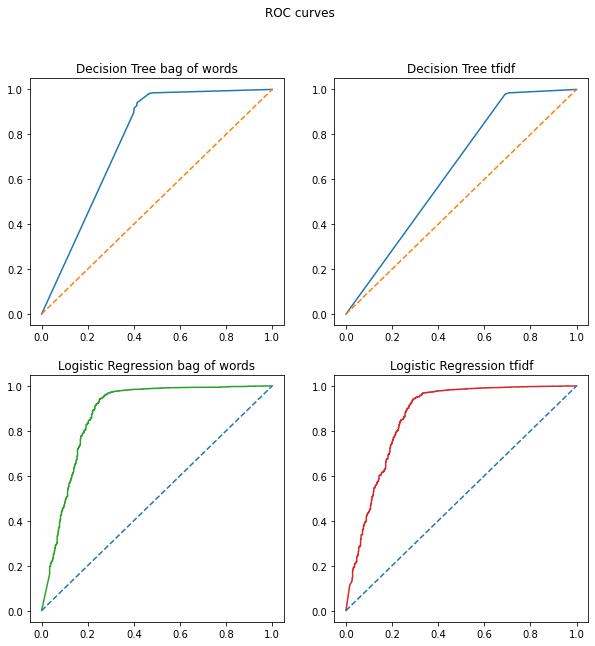

In [74]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))
fig.suptitle('ROC curves')
axs[0, 0].plot(false_positive_rate_DTC_bow , true_positive_rate_DTC_bow)
axs[0, 0].set_title('Decision Tree bag of words')
axs[0,0].plot([0, 1], ls="--")
axs[0, 1].plot(false_positive_rate_DTC_tfidf , true_positive_rate_DTC_tfidf)
axs[0, 1].set_title('Decision Tree tfidf')
axs[0,1].plot([0, 1], ls="--")
axs[1, 0].plot(false_positive_rate_LR_bow , true_positive_rate_LR_bow, 'tab:green')
axs[1, 0].set_title('Logistic Regression bag of words')
axs[1,0].plot([0, 1], ls="--")
axs[1, 1].plot(false_positive_rate_LR_tfidf , true_positive_rate_LR_tfidf, 'tab:red')
axs[1, 1].set_title('Logistic Regression tfidf')
axs[1,1].plot([0, 1], ls="--")

# Q5. Plot top 10 features.

In [77]:
##Plotting the top features
## using the trained logistic regression model with tfidf
##We will derive the top features(words) using a Logistic Regression max 10 coefficeints and using it to extract the corresponding
##words from the tfidf vocabulary
topcoef_indices=np.argsort(lrclftfidfvec_tuned.best_estimator_.coef_.reshape(-1,))[-10:]




In [80]:
## to lookup the indices calculated in the previous step
inverted_vocab = {value:key for key,value in vectorizer_tfidf.vocabulary_.items()}

In [81]:
print("Displaying the 10 words used by the Logistic Regression algorithm with tfidf features")
print("Order is increasing from the least important feature to the most important feature")
print("------------top 10 words--------------")
for i in topcoef_indices:
    print(inverted_vocab[i])

Displaying the 10 words used by the Logistic Regression algorithm with tfidf features
Order is increasing from the least important feature to the most important feature
------------top 10 words--------------
morning
grandkids
age
joke
grandchild
upgrade
perfect
excellent
love
family


### Please note that there is randomisation while vectorizing so some words may change rank or some new words may come with every run. Also evaluation  metrics may change slightly , because of the randomisation.

## 6. Identification of the performance parameters to be improved, for the given problem statement.

### The biggest imrovement could be collecting more negative reviews, we tried upsampling the negative reviews and downsampling positive reviews but that did not help to improve our evaluation metrics